In [1]:
%matplotlib notebook
import numpy as np
from scipy.optimize import curve_fit

import ipywidgets as widgets
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
from astropy.coordinates import EarthLocation
from astropy.time import Time
from astropy import units as u

# Telescope Position Data

In [2]:
lst, alt, az, ra, dec = np.loadtxt('data/telescope_orientation.csv', delimiter=',', unpack=True)
ha = lst - ra

<IPython.core.display.Javascript object>


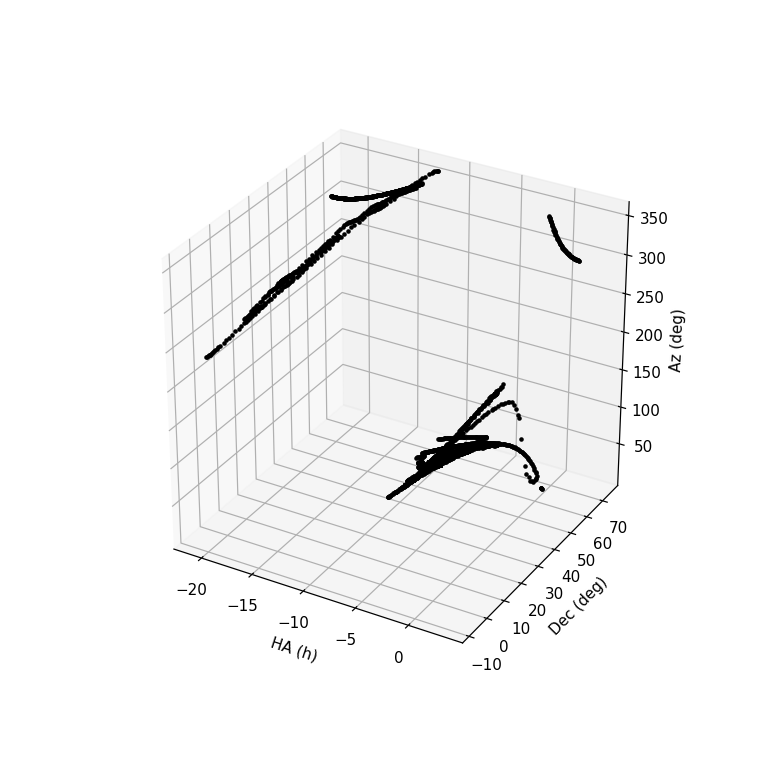

In [3]:
fig = plt.figure(figsize=(7, 7))
frame = fig.add_subplot(1, 1, 1, projection ='3d')

frame.grid(True, alpha=0.5)
# frame.set_xlim(-5, 5)
# frame.set_ylim(-5, 5)
# frame.set_zlim(0, 5)

frame.set_xlabel('HA (h)')
frame.set_ylabel('Dec (deg)')
frame.set_zlabel('Az (deg)')

plt.plot(ha, dec, az, color='black', ls='', marker='o', ms=2)
plt.show()

# Computing HA

In [4]:
def compute_ha(ra, date):
    observing_location = EarthLocation(lat=53.240243*u.deg, lon=6.53651*u.deg) # Blaauw Observatory
    observing_time = Time(date, scale='utc', location=observing_location)
    lst = observing_time.sidereal_time('mean')
    
    print('LST = {:.5f} h'.format(lst.hour))
    
    return lst.hour - ra

## 13:17

In [5]:
ra_ex = 6 + 2 * 1/60 + 7 * 1/3600
dec_ex = 50 + 50 * 1/60
ha_ex = compute_ha(ra_ex, datetime(2021, 5, 14, hour=11, minute=17))

print('HA = {:.2f} h = {:.2f} deg & Dec = {:.2f} deg'.format(ha_ex, ha_ex * 15, dec_ex))

LST = 3.21393 h
HA = -2.82 h = -42.32 deg & Dec = 50.83 deg


## 13:19

In [6]:
ra_ex = 6 + 28 * 1/60 + 1 * 1/3600
dec_ex = 7 + 50 * 1/60 # deg
ha_ex = compute_ha(ra_ex, datetime(2021, 5, 14, hour=11, minute=19)) 

print('HA = {:.2f} h = {:.2f} deg & Dec = {:.2f} deg'.format(ha_ex, ha_ex * 15, dec_ex))

LST = 3.24736 h
HA = -3.22 h = -48.29 deg & Dec = 7.83 deg


# Above 15 deg

In [7]:
def altitude(ha, dec):
    """Returns altitude in deg."""
    lat = np.radians(53.24)
    dec = np.radians(dec)
    ha  = np.radians(ha)
    
    term_1 = np.sin(dec)*np.sin(lat)
    term_2 = np.cos(dec)*np.cos(lat)*np.cos(ha)
    
    a = np.degrees(np.arcsin(term_1 + term_2))
    
    return a

In [8]:
_h = np.linspace(-179, 180, 360) 
_dec = np.linspace(-90, 90, 181)

h, dec = np.meshgrid(_h, _dec, indexing='ij')

In [9]:
alt = altitude(h, dec)
cond = alt >= 15

<IPython.core.display.Javascript object>


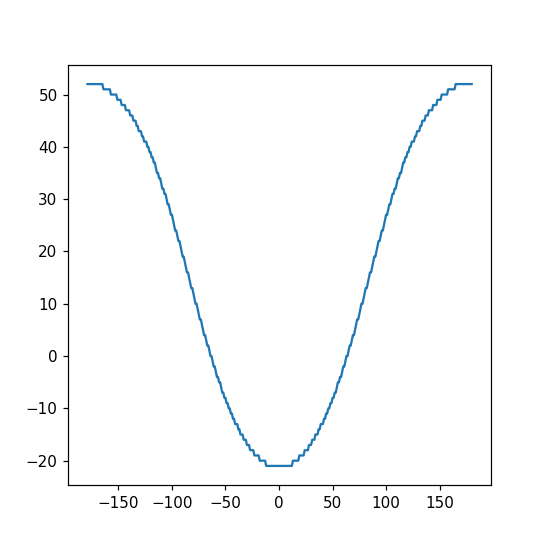

In [10]:
# %matplotlib inline

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

h_sel = h[cond]
dec_sel = dec[cond]

# plt.scatter(h_sel, dec_sel, s=2)


plt.show()

In [11]:
decs = []
for h in _h:
    min_dec = dec_sel[h_sel == h].min()
    
    decs.append(min_dec)

decs = np.array(decs)

In [12]:
plt.plot(_h, decs)

In [13]:
def cos_func(x, a, b, c):
    return a*np.cos(b*x)+c

p_init = (-40, 0.05, 20)
ps, cov = curve_fit(cos_func, _h, decs, p_init)

In [14]:
h_range = np.linspace(-180, 180, 500)

In [15]:
# plt.plot(h_selected[::4], dec_selected[::4], color='green', ls='', marker='o', ms=1)

# # plt.scatter(_h, decs, s=2, alpha=0.5, color='blue')
# plt.plot(h_sel, dec_sel, color='blue', ls='', marker='o', ms=1)
# plt.plot(h_range, cos_func(h_range, *ps), color='black')